### University of San Diego 

### Master of Science, Applied Data Science 

#### Contributors

- Hoori Javadnia
- Salvador Sanchez
- Jacqueline Vo

***

# 1. Data Overview

### Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

- User_ID: Unique ID of the user. 
- Product_ID: Unique ID of the product. 
- Gender: indicates the gender of the person making the transaction.
- Age: indicates the age group of the person making the transaction.
- Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
- City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
- Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
- Marital_Status: is 0 if the user is not married and 1 otherwise.
- Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
- Purchase: Purchase amount.

***

# 2. Data imports

In [11]:
#Import packages
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [7]:
#Import csv into train/test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [8]:
#Training dataset
display(train_df.head())
train_df.shape

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


(550068, 12)

In [9]:
#Test dataset
display(test_df.head())
test_df.shape

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


(233599, 11)

# 3. Exploratory Data Analysis (EDA)
Rubric: Discussion is very thorough. All aspects of the data exploration and EDA that are relevant to the main project objectives are carefully addressed.
Figures and tables are highly insightful, and are carefully tailored to the project tasks and report.
##

## 3.1 Data Quality Report

In [10]:
df = train_df


#Initial table
freqDF = pd.DataFrame(columns=['Feature',
                               'Mode',
                               'Mode Freq.',
                               'Mode %',
                               '2nd Mode',
                               '2nd Mode Freq.',
                               '2nd Mode %'])
for col in df.columns:
    freq = df[col].value_counts()
    freqdf = freq.to_frame()
    fRow = freqdf.iloc[0]
    secRow = freqdf.iloc[1]
    fPrct = fRow[0] / len(df[col])
    secPrct = secRow[0] / len(df[col])
    try:
        mode1 = int(fRow.name)
    except:
        mode1 = fRow.name
    try:
        mode2 = int(secRow.name)
    except:
        mode2 = secRow.name
    freqDF = freqDF.append({'Feature':col,
                            'Mode':mode1,
                            'Mode Freq.':fRow[0],
                            'Mode %':fPrct,\
                            '2nd Mode':mode2,
                            '2nd Mode Freq.':secRow[0],
                            '2nd Mode %':secPrct},
                            ignore_index=True)

freqDF = freqDF.set_index('Feature')

#Nulls, Counts, Cardinality
NUllFeatures = round(df.isnull().sum() / df.shape[0],4)\
      .sort_values(ascending=False)
Count = df.count()
uni = df.nunique()

#Formating
NUllFeatures.to_frame(name="% Miss.")
Count.to_frame(name="Count")
uni.to_frame()
result = pd.concat([Count, NUllFeatures,uni], axis=1)
result.columns =["Count","% Miss.","Card."]
result = pd.concat([result, freqDF], axis=1)
result.style.format({'% Miss.': "{:.1%}",
                     'Mode %': "{:.0%}",
                     '2nd Mode %': "{:.0%}",
                     'Count': "{:,}",
                     'Card.': "{:,}",
                     'Mode Freq.': "{:,}",
                    '2nd Mode Freq.': "{:,}"})

,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
User_ID,"550,068",0.0%,"5,891",1001680,"1,026",0%,1004277,979,0%
Product_ID,"550,068",0.0%,"3,631",P00265242,"1,880",0%,P00025442,"1,615",0%
Gender,"550,068",0.0%,2,M,"414,259",75%,F,"135,809",25%
Age,"550,068",0.0%,7,26-35,"219,587",40%,36-45,"110,013",20%
Occupation,"550,068",0.0%,21,4,"72,308",13%,0,"69,638",13%
City_Category,"550,068",0.0%,3,B,"231,173",42%,C,"171,175",31%
Stay_In_Current_City_Years,"550,068",0.0%,5,1,"193,821",35%,2,"101,838",19%
Marital_Status,"550,068",0.0%,2,0,"324,731",59%,1,"225,337",41%
Product_Category_1,"550,068",0.0%,20,5,"150,933",27%,1,"140,378",26%
Product_Category_2,"376,430",31.6%,17,8,"64,088",12%,14,"55,108",10%


<div class="alert alert-block alert-success">
The data quality report shows that each observations in the data represent a product being sold, We have 550,068 observation but only 5,891 users that purchased from population of 3,631 products.
</div>

## 3.2 Initial visualizations

<AxesSubplot:>

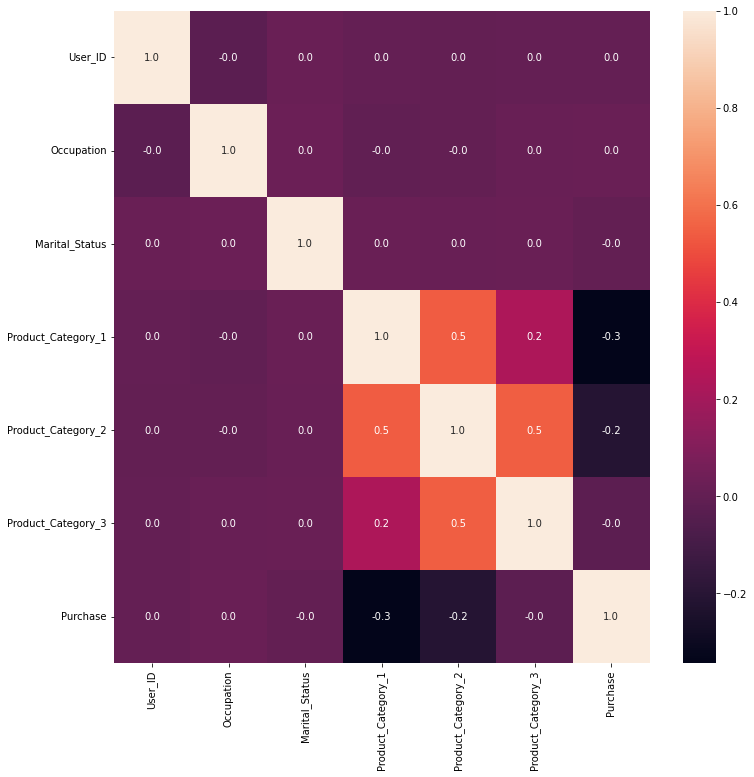

In [18]:
# Preliminary identification of correlation within features
corr = train_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar = True, annot = True,
            fmt = '.1f', annot_kws = {'size': 10})

Most of the variables don't appear to be correlated. Some relationships that we can explore are:
- Purchase
- Product_Category_1
- Product_Category_2
- Product_Category_3

But first, we can explore the customers and their purchasing behavior:

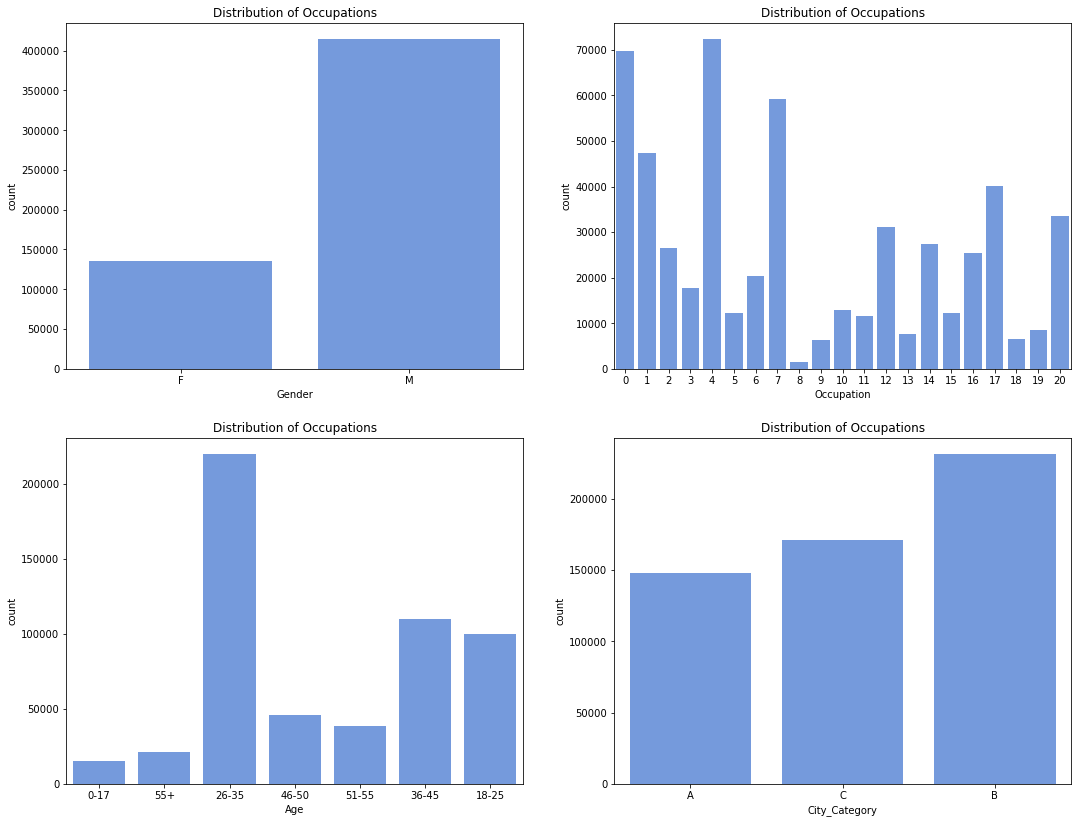

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,14))

ax = sns.countplot(data=train_df, x='Gender', color='cornflowerblue',
                   ax=axes[0,0]).set(title='Distribution of Occupations')

ax = sns.countplot(data=train_df, x='Occupation', color='cornflowerblue',
                   ax=axes[0,1]).set(title='Distribution of Occupations')

ax = sns.countplot(data=train_df, x='Age', color='cornflowerblue',
                   ax=axes[1,0]).set(title='Distribution of Occupations')

ax = sns.countplot(data=train_df, x='City_Category', color='cornflowerblue',
                  ax=axes[1,1]).set(title='Distribution of Occupations')

We will need to keep in mind that our data has a larger sample of customers that are men, in the 26-35 year old range, living in City Category B, and working in occupation 0, 4, and 7.

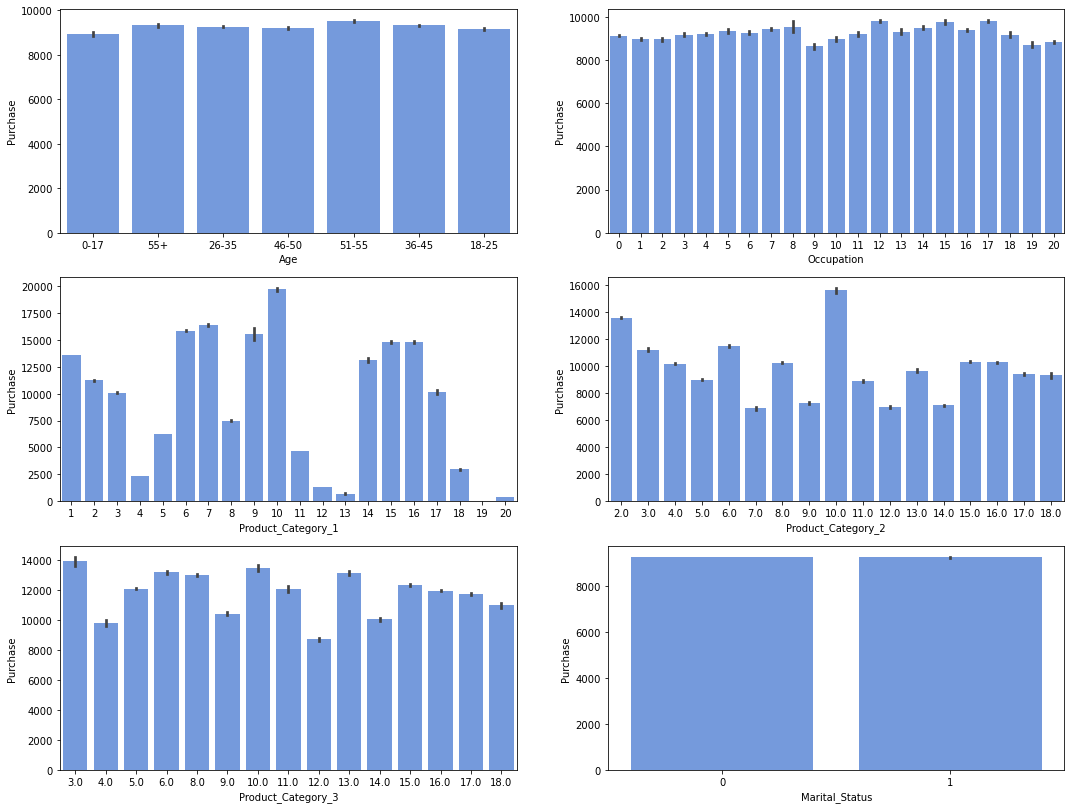

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,14))

ax = sns.barplot(x='Age', y='Purchase', data=train_df, color='cornflowerblue', ax=axes[0,0])

ax = sns.barplot(x='Occupation', y='Purchase', data=train_df, color='cornflowerblue', ax=axes[0,1])

ax = sns.barplot(x='Product_Category_1', y='Purchase', data=train_df, color='cornflowerblue', ax=axes[1,0])

ax = sns.barplot(x='Product_Category_2', y='Purchase', data=train_df, color='cornflowerblue', ax=axes[1,1])

ax = sns.barplot(x='Product_Category_3', y='Purchase', data=train_df, color='cornflowerblue', ax=axes[2,0])

ax = sns.barplot(x='Marital_Status', y='Purchase', data=train_df, color='cornflowerblue', ax=axes[2,1])

The age, occupation, and marital status of a customer appear to not generally influence how much money they spend. Instead, we can look at the product categories. In Category 1, 9 performs the best, while 19 has no profit generated.

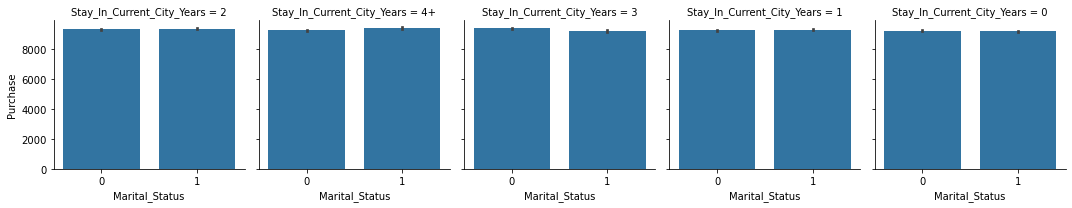

In [19]:
ax = sns.FacetGrid(data=train_df,col="Stay_In_Current_City_Years")
ax.map(sns.barplot, "Marital_Status", "Purchase");

Regardless of a customer's marital status, it appears that the purchase amount does not change nor does the years someone stays in a certain city appear to be related.

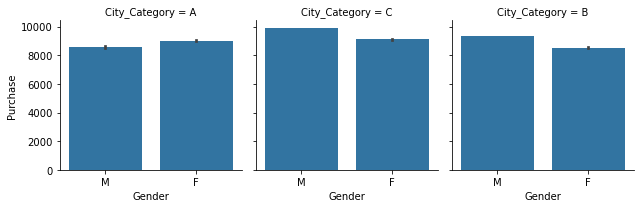

In [20]:
ax = sns.FacetGrid(data=train_df,col="City_Category")
ax.map(sns.barplot, "Gender", "Purchase")

When looking at the change in purchase price by gender, men marginally purchase more in City_Category B and C. There is very little difference in City Category_A.

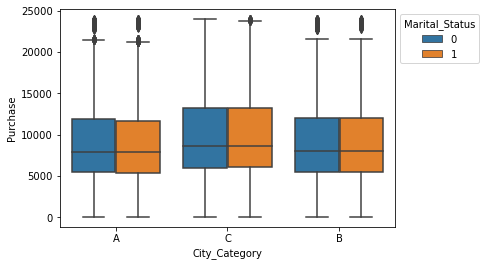

In [25]:
ax = sns.boxplot(x='City_Category', y='Purchase', hue='Marital_Status', data=train_df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Even when comparing purchase habits by city_category and martial_status, there is very little difference.

# Data Pre-processing
Rubric: All preprocessing steps are clearly explained.
## Data Splitting

# Data Modeling
Rubric: Predictive modeling methods are well motivated, correctly implemented, and, to the extent appropriate, span the range of methods discussed in this course.
## Model Performance & Hyperparameter Tuning
Rubric: Cross-validation and/or held-out test sets are used in accordance with best practices to assess model performance. Performance metrics are carefully tailored to the project objectives.

# Final Model

## Results
Rubric: All project objectives are fully met, the findings are presented clearly, and the question(s) are technically addressed in the report and presentation.